In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Fitting

In [11]:
x = np.array([[1,1],[2,1]]) # feature
y = np.array([1,2]) # label
x

array([[1, 1],
       [2, 1]])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

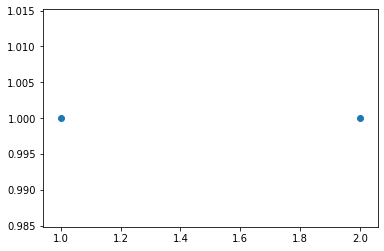

In [17]:
plt.scatter(x[:,0], x[:,1])
clf=SVC(kernel='linear')
clf.fit(x, y)

In [21]:
print(x[:1])
print(x[:,1])
# 이게 어떤 차이일까?

[[1 1]]
[1 1]


### 현재 x = [[1,1],[2,1]]

#### print(x[:1])
이것은 x라는 array의 원소 중 index 0부터 index 1이전 까지의 원소를 출력.
즉, array의 원소 중 index 0만을 출력.

#### print(x[:,1])
이것은 x라는 array의 모든 원소들에 대하여 각 원소의 두 번째 원소(왜냐하면 index 1은 두 번째 원소이기 때문에!) 를 차례대로 출력. 즉, x의 첫 번째 원소 [1,1] 의 두 번째 원소 1 과 x의 두 번째 원소 [2,1]의 두 번째 원소 1이 출력된 것이다.

#### iris.data[ : , : 2] 는 무엇일까?
교수님이 과제내주신 것에서 VIsualization 쪽에 이게 있었다.
콤마를 기준으로 왼쪽은 row 갯수, 오른쪽은 column 갯수를 의미한다.
즉, row는 전부 가져오고, column은 두 번째 것 까지만 가져오라.
(사실 잘 모르겠음...)

In [22]:
# Define the borders of our grid using maximization from x and y
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1 # plot의 처음과 끝값을 지정해주기 위한 변수. 그림을 더 이쁘게 그리려고 설정중.
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1 # 마찬가지
h=.02 # 축의 단위 설정 변수. 간격을 조정하는 것이다. 적을수록 세밀

In [23]:
# Define the grid with the useful meshgrid function
# xx – y의 차원크기의 행의 개수만큼 반복된 값을 가지고 있는 변수
# yy – x의 차원크기의 열의 개수만큼 반복된 값을 가지고 있는 변수
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# 함수 설명

# np.meshgrid() : 1차원 배열형태의 데이터들이 주어지면 2차원 배열형태로 교체해주는 함수. 그래프에 그리드를 그려준다고 생각하자.

# np.arange(3, 21, 2)  # 시작, 끝(포함하지 않음), 간격: 지정된 간격 내에서 균등하게 간격을 둔 값을 배열
# >> array([ 3,  5,  7,  9, 11, 13, 15, 17, 19])

In [24]:
xx

array([[0.  , 0.02, 0.04, ..., 2.94, 2.96, 2.98],
       [0.  , 0.02, 0.04, ..., 2.94, 2.96, 2.98],
       [0.  , 0.02, 0.04, ..., 2.94, 2.96, 2.98],
       ...,
       [0.  , 0.02, 0.04, ..., 2.94, 2.96, 2.98],
       [0.  , 0.02, 0.04, ..., 2.94, 2.96, 2.98],
       [0.  , 0.02, 0.04, ..., 2.94, 2.96, 2.98]])

In [25]:
xx.shape
# 0부터 2까지 0.02씩 쪼갰을 때 100개
# 0부터 3까지 0.02씩 쪼갰을 때 150개

(100, 150)

# Predict

In [26]:
# 학습된 clf 모델에 데이터를 입력후 어떤 class값인지 분류한 값을 Z변수에 저장함. 즉 Z값은 분류결과
# 위에서 2차원으로 펼쳐놨던 xx를 다시 일렬로 펼쳐놓는 것이다.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# 그래프 상의 모든 점들이 어느 그룹에 속하고 있는지 classification

In [27]:
# np.c_[xx.ravel(), yy.ravel()]
# 이것은 그래프 상의 모든 그리드 위의 점을 표현
# classification 하기 위함임.

In [28]:
Z = Z.reshape(xx.shape)

(0, 2)

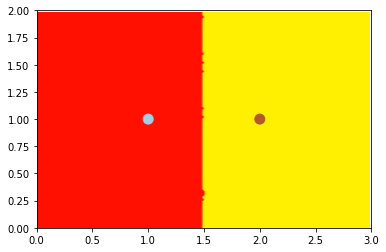

In [29]:
plt.contourf(xx, yy, Z, cmap=plt.cm.autumn, alpha=1)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, s=100)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

(0, 2)

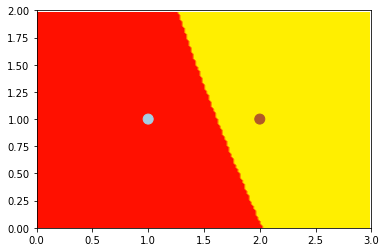

In [30]:
clf = SVC(kernel='poly', gamma='auto')
clf.fit(x, y)
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.autumn, alpha=1)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, s=100)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 이렇게 kernel을 linear 말고 poly로 바꾸면 요래 나올 수도 있다.